## 01. Import Libraries and Data

In [54]:
#import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [78]:
#import state party control data

path = r'/Users/juliewhitton/Desktop/Personal Project/'
df = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'party_laws.csv'), usecols = ['state', 'year', 
                                                                                        'state_control', 
                                                                                        'gun_law_strength'])
df.head()

,state,year,state_control,gun_law_strength
0,AL,2014,Rep,Weak
1,AK,2014,Rep,Weak
2,AZ,2014,Rep,Weak
3,AR,2014,Divided,Weak
4,CA,2014,Dem,Strong


In [80]:
#import inc_rate

df_rate = pd.read_csv(os.path.join(path, 'Data', 'Final Data', 'incident_rate.csv'))
df_rate.head()

,state,year,inc_rate
0,HI,2014,3.393334
1,HI,2017,4.773963
2,HI,2015,5.274069
3,HI,2016,5.533922
4,AZ,2015,7.028152


In [81]:
df_rate.shape

(204, 3)

In [82]:
df.shape

(204, 4)

## 02. Wrangle Data for Time Series Analysis

In [190]:
#merge inc rate to df

df_time = pd.merge(df, df_rate, on = ['state', 'year'])
df_time.head()

,state,year,state_control,gun_law_strength,inc_rate
0,AL,2014,Rep,Weak,27.221287
1,AK,2014,Rep,Weak,19.829332
2,AZ,2014,Rep,Weak,8.261009
3,AR,2014,Divided,Weak,19.276186
4,CA,2014,Dem,Strong,9.669152


In [191]:
#replace Dem* values

df_time['state_control'].replace({'Dem*': 'Dem'}, inplace = True)
df_time['state_control'].value_counts()

Rep        97
Divided    67
Dem        40
Name: state_control, dtype: int64

In [210]:
#change 'year' to datetime 

df_time['year'].astype('int32')
pd.to_datetime(df_time.year, format = '%Y')
df_time.head()

,state,year,state_control,gun_law_strength,inc_rate
0,AL,2014,Rep,Weak,27.221287
1,AK,2014,Rep,Weak,19.829332
2,AZ,2014,Rep,Weak,8.261009
3,AR,2014,Divided,Weak,19.276186
4,CA,2014,Dem,Strong,9.669152


In [211]:
df_time.shape

(204, 5)

In [216]:
#create df for mean inc_rate of entire country

df_us = df_time.drop(columns = ['state', 'state_control', 'gun_law_strength']).groupby(
    'year', as_index = False)['inc_rate'].mean().set_index('year')
df_us.head()

,inc_rate
year,
2014,19.669039
2015,20.422875
2016,21.369445
2017,23.306556


In [217]:
df_us.shape

(4, 1)

In [218]:
#create df by gun_law_strength

df_strength_inc = df_time.groupby(['year', 'gun_law_strength'], as_index = False)['inc_rate'].mean().set_index('year')
df_strength_inc.head()

,gun_law_strength,inc_rate
year,,
2014,Average,17.947361
2014,Strong,29.510308
2014,Weak,16.622414
2015,Average,18.684257
2015,Strong,24.743728


In [219]:
#create separate dfs for gun_law_strength cats

df_weak = df_strength_inc.loc[df_strength_inc['gun_law_strength'] == 'Weak']
df_weak.drop(columns = 'gun_law_strength', inplace = True)
df_weak.head()

,inc_rate
year,
2014,16.622414
2015,20.087997
2016,21.070842
2017,21.286552


In [220]:
df_average = df_strength_inc.loc[df_strength_inc['gun_law_strength'] == 'Average']
df_average.drop(columns = 'gun_law_strength', inplace = True)
df_average.head()

,inc_rate
year,
2014,17.947361
2015,18.684257
2016,19.643576
2017,19.059235


In [221]:
df_strong = df_strength_inc.loc[df_strength_inc['gun_law_strength'] == 'Strong']
df_strong.drop(columns = 'gun_law_strength', inplace = True)
df_strong.head()

,inc_rate
year,
2014,29.510308
2015,24.743728
2016,25.448246
2017,36.043204


In [123]:
#create df for state_control

df_party_inc = df_time.groupby(['year', 'state_control'], as_index = False)['inc_rate'].mean().set_index('year')
df_party_inc.head()

,state_control,inc_rate
year,,
2014,Dem,23.787247
2014,Divided,16.852327
2014,Rep,18.214561
2015,Dem,26.233341
2015,Divided,19.082706


In [224]:
#create separate dfs for state_control cats

df_dem = df_party_inc.loc[df_party_inc['state_control'] == 'Dem']
df_dem.drop(columns = 'state_control', inplace = True)
df_dem.head()

,inc_rate
year,
2014,23.787247
2015,26.233341
2016,24.405032
2017,34.260710


In [225]:
df_div = df_party_inc.loc[df_party_inc['state_control'] == 'Divided']
df_div.drop(columns = 'state_control', inplace = True)
df_div.head()

,inc_rate
year,
2014,16.852327
2015,19.082706
2016,21.233728
2017,22.076327


In [226]:
df_rep = df_party_inc.loc[df_party_inc['state_control'] == 'Rep']
df_rep.drop(columns = 'state_control', inplace = True)
df_rep.head()

,inc_rate
year,
2014,18.214561
2015,19.547020
2016,20.465025
2017,20.686991


In [227]:
#get mean of inc_rate by party and law strength

df_party_strength = df_time.groupby(['year', 'state_control', 'gun_law_strength'], 
                                    as_index = False)['inc_rate'].mean().set_index('year')
df_party_strength.head()

,state_control,gun_law_strength,inc_rate
year,,,
2014,Dem,Average,12.576744
2014,Dem,Strong,30.882755
2014,Dem,Weak,27.190690
2014,Divided,Average,16.026869
2014,Divided,Strong,17.158280


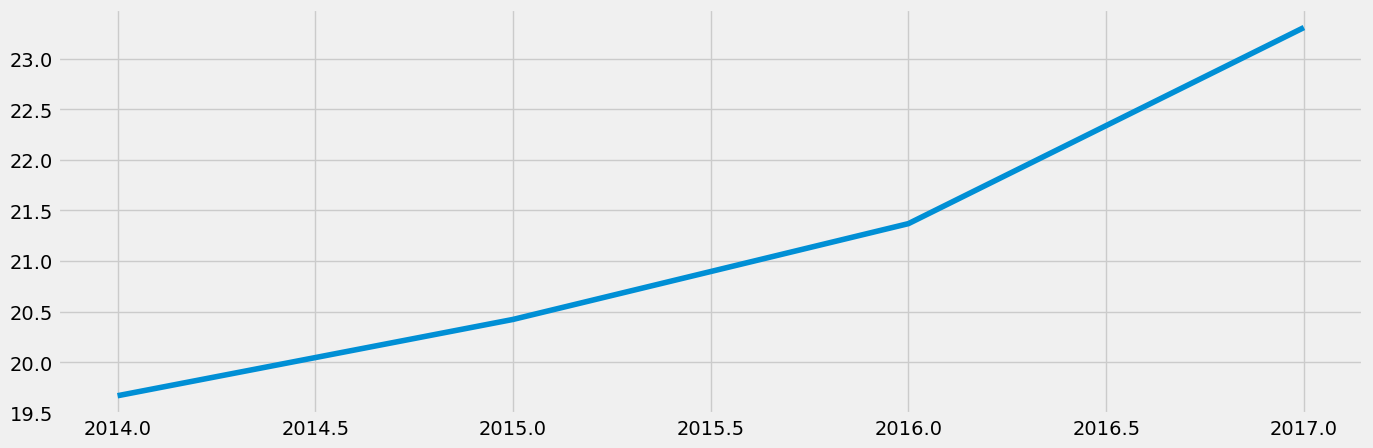

In [155]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_us)

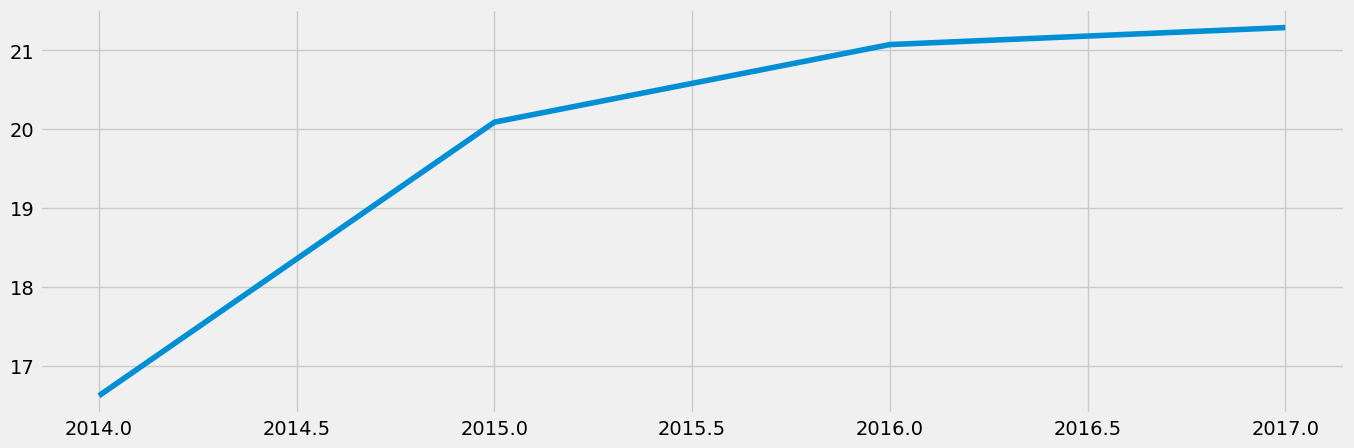

In [177]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_weak)

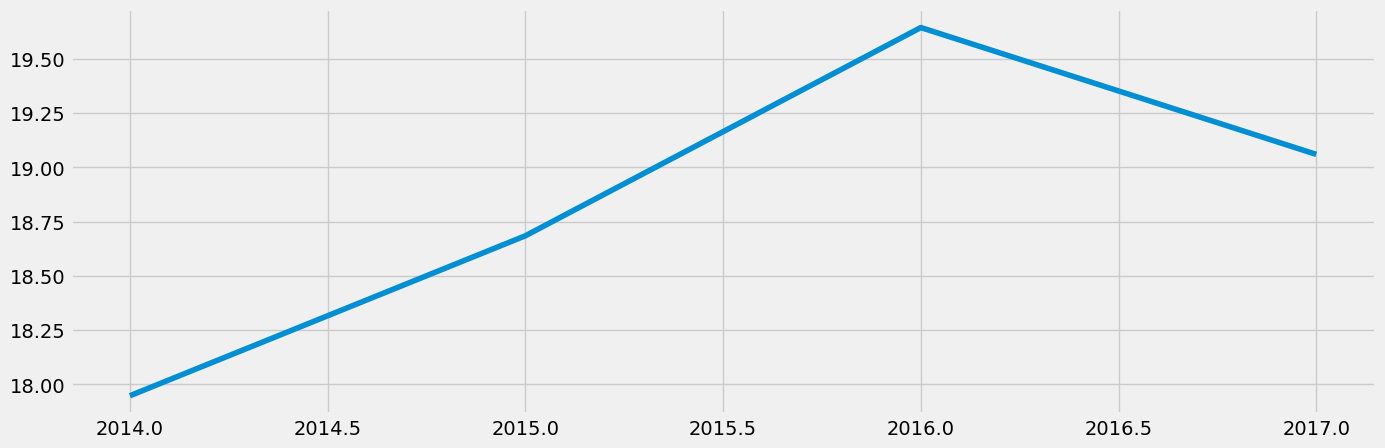

In [178]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_average)

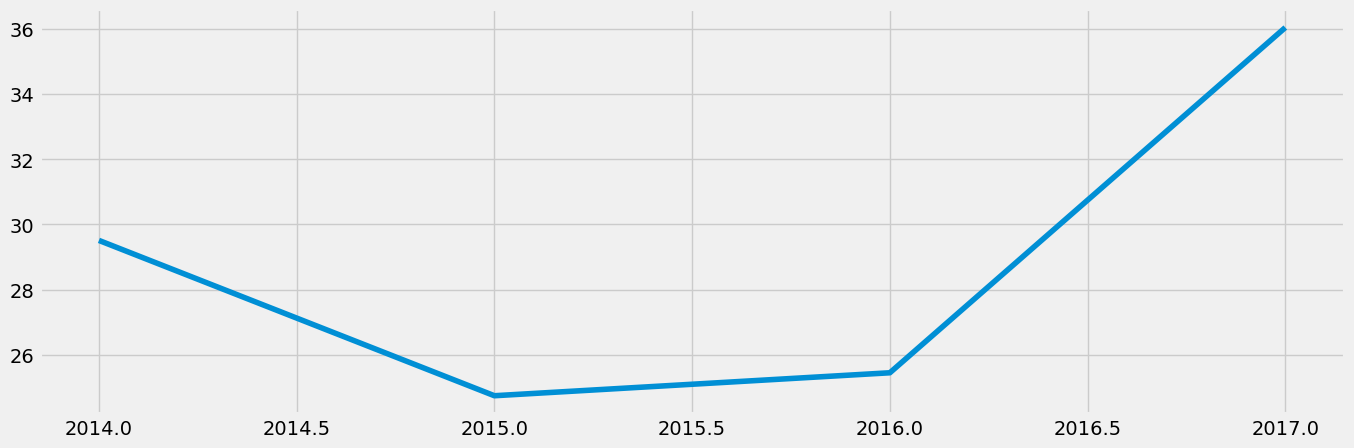

In [179]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_strong)

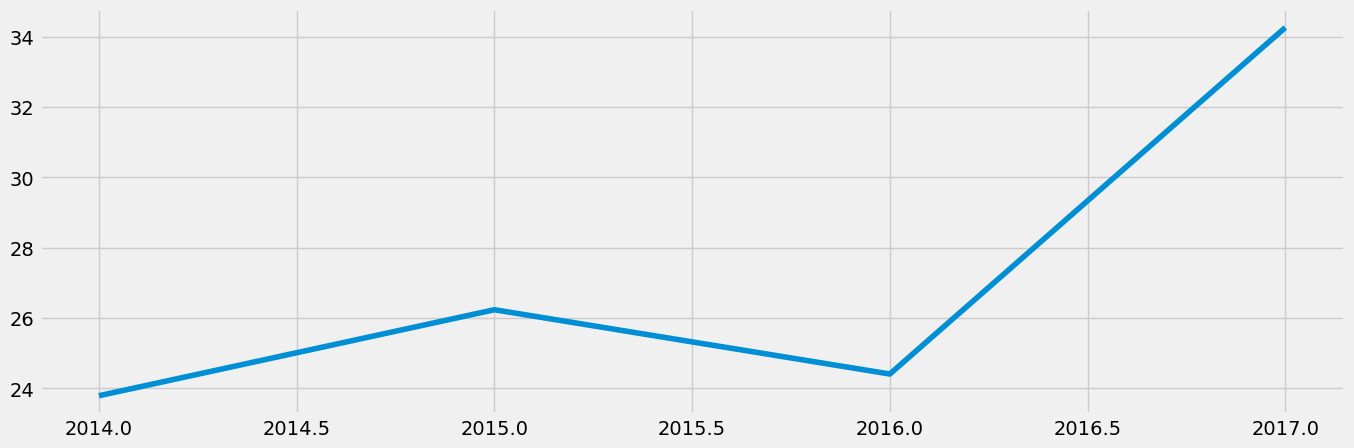

In [228]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_dem)

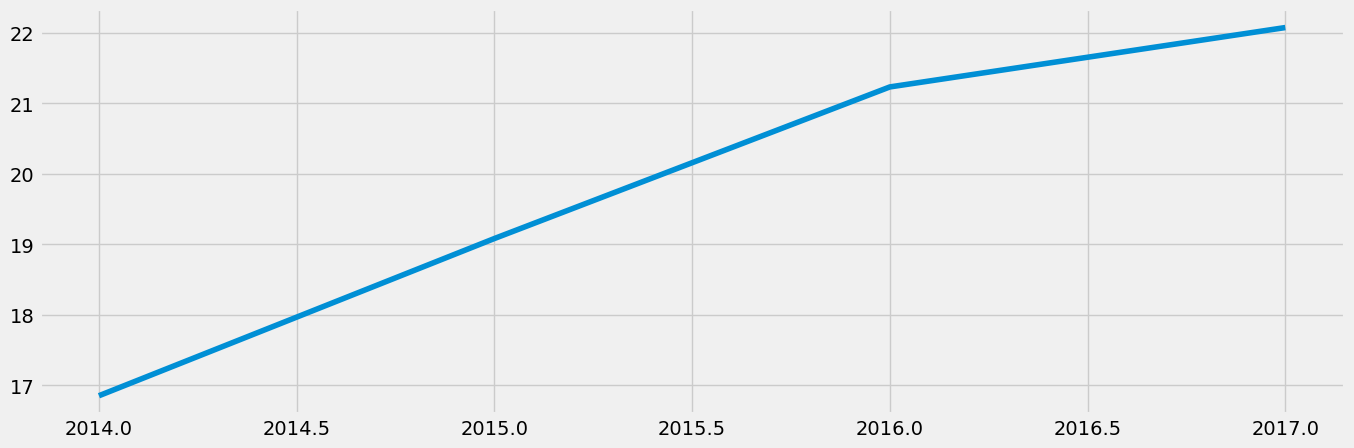

In [229]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_div)

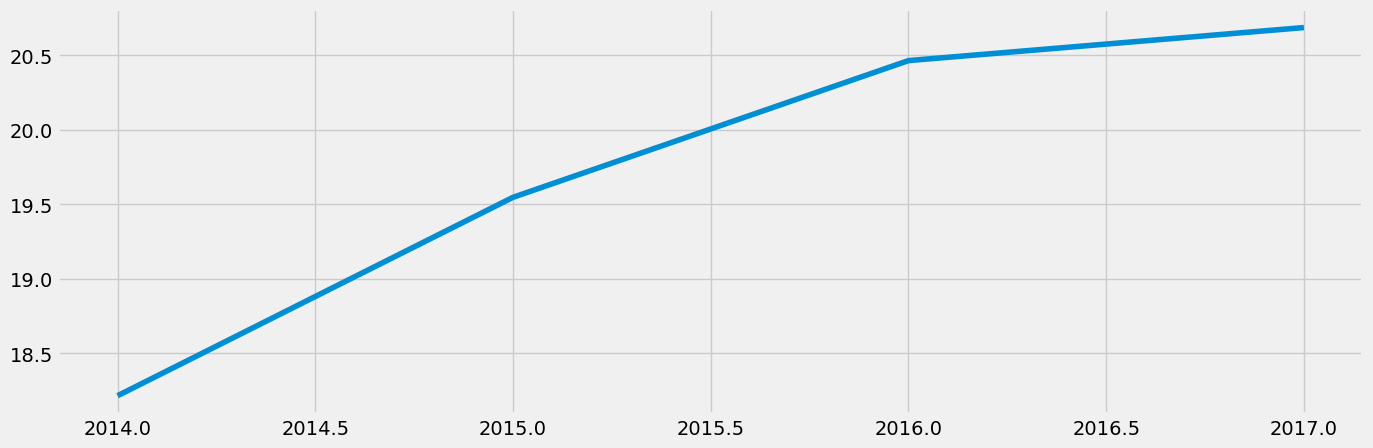

In [230]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_rep)

## 04. Decomposition

In [181]:
# Decompose the time series using an additive model
#df_us.asfreq('A', 'Y')
decomposition = sm.tsa.seasonal_decompose(df_weak, model='additive', period = 1)

In [182]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

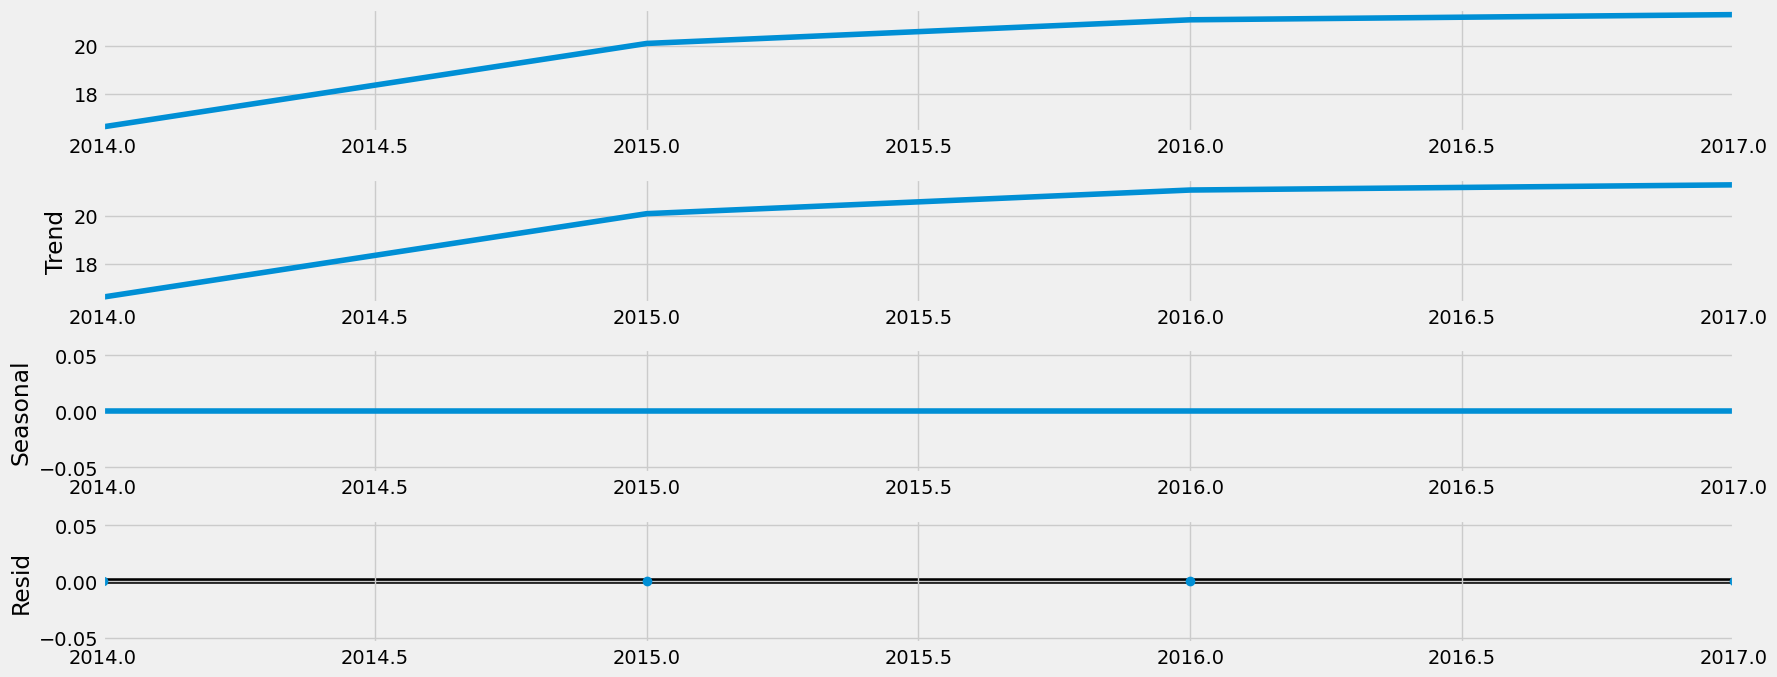

In [183]:
decomposition.plot()
plt.show()

My data shows a slight upward trend with no seasonality or noise.

## 05. Testing for Stationarity

In [231]:
#run Dickey_fuller test

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_us['inc_rate'])

Dickey-Fuller Stationarity test:
Test Statistic                  3.166704
p-value                         1.000000
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


The stationarity test indicates that my data is very much not stationary and does not include a wide enough time span to produce insightful results.

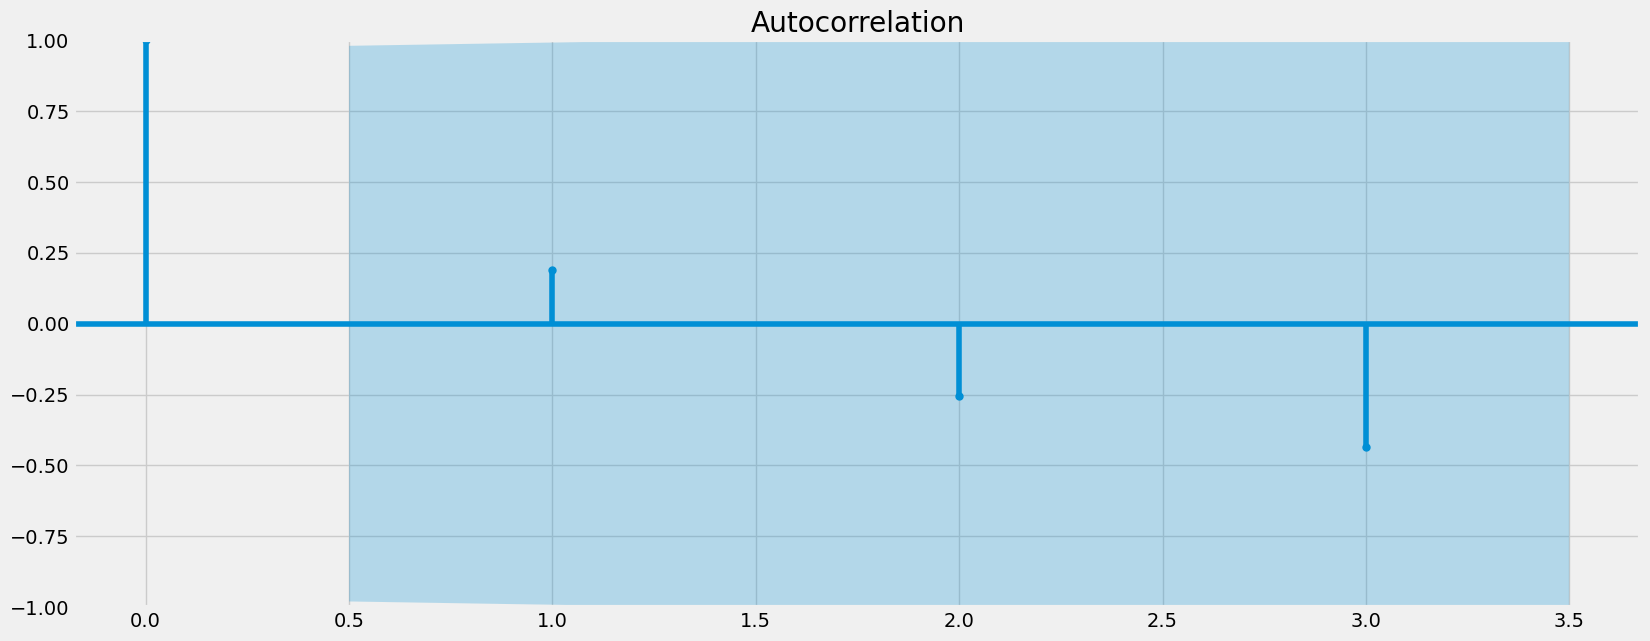

In [232]:
#test for autocorrelation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_us)
plt.show()

In [233]:
#stationarizing df_us

df_diff = df_us - df_us.shift(1)
df_diff.dropna(inplace = True)
df_diff.head()

,inc_rate
year,
2015,0.753836
2016,0.946570
2017,1.937111


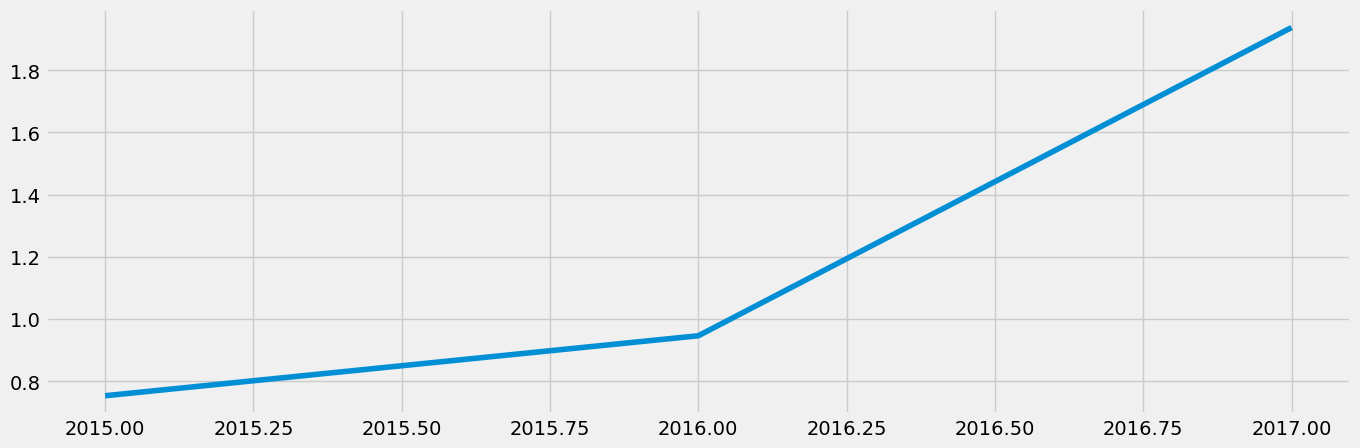

In [234]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [235]:
#run dickey-fuller again

dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:


ValueError: sample size is too short to use selected regression component

I could not run the stationarity test again because I do not have enough different datetime variables.